In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Dataset
import zipfile

z = zipfile.ZipFile('archive.zip')

z.extractall()

In [4]:
import os

folder = "brain_tumor_dataset/yes/"
count = 1

for filename in os.listdir(folder):
    source = os.path.join(folder, filename)
    destination = os.path.join(folder, f"Y_{count}.jpg")

    while os.path.exists(destination):
        count += 1
        destination = os.path.join(folder, f"Y_{count}.jpg")

    os.rename(source, destination)
    count += 1

print("All files renamed uniquely.")


All files renamed uniquely.


In [7]:
import os

folder = "brain_tumor_dataset/yes/"
count = 1

for filename in os.listdir(folder):
    source = os.path.join(folder, filename)
    destination = os.path.join(folder, f"Y_{count}.jpg")

    while os.path.exists(destination):
        count += 1
        destination = os.path.join(folder, f"Y_{count}.jpg")

    os.rename(source, destination)
    count += 1

print("All files renamed uniquely.")


All files renamed uniquely.


In [8]:
# EDA(Exploratory Data Analysis)

In [9]:
listyes = os.listdir("brain_tumor_dataset/yes/")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("brain_tumor_dataset/no/")
number_files_no = len(listno)
print(number_files_no)

310
196


In [10]:
# Plot

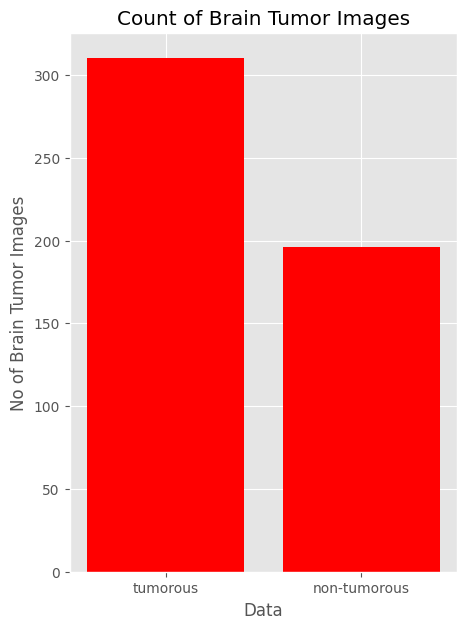

In [11]:
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()

In [12]:
# Data Augmentation
# 155(61%), 98(39%)
# imbalance

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [14]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

In [15]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10, 
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x = image, batch_size = 1, save_to_dir = save_to_dir, save_prefix = save_prefix, save_format = "jpg"):
            i+=1
            if i>n_generated_samples:
                break

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# -------------------------------
# Function: Augment Images
# -------------------------------
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    """
    Generates augmented images from the given directory and saves them.
    
    Args:
        file_dir (str): Path to the source image directory.
        n_generated_samples (int): Number of augmented images to generate per original image.
        save_to_dir (str): Directory where augmented images will be saved.
    """
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Process each image in the folder
    for filename in os.listdir(file_dir):
        img_path = os.path.join(file_dir, filename)

        # Skip non-image files
        if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        try:
            image = load_img(img_path)
            x = img_to_array(image)
            x = np.expand_dims(x, axis=0)

            i = 0
            for batch in datagen.flow(
                x,
                batch_size=1,
                save_to_dir=save_to_dir,
                save_prefix='aug',
                save_format='jpg'
            ):
                i += 1
                if i >= n_generated_samples:
                    break  # Stop after generating required samples
        except Exception as e:
            print(f"⚠️ Error processing {filename}: {e}")

# -------------------------------
# Define directories
# -------------------------------
base_path = "brain_tumor_dataset"
yes_path = os.path.join(base_path, "yes")
no_path = os.path.join(base_path, "no")

augmented_data_path = "augmented_data"
os.makedirs(os.path.join(augmented_data_path, 'yes'), exist_ok=True)
os.makedirs(os.path.join(augmented_data_path, 'no'), exist_ok=True)

# -------------------------------
# Run augmentation
# -------------------------------
print("🚀 Starting augmentation...")

augmented_data(file_dir=yes_path, n_generated_samples=6, save_to_dir=os.path.join(augmented_data_path, 'yes'))
augmented_data(file_dir=no_path, n_generated_samples=9, save_to_dir=os.path.join(augmented_data_path, 'no'))

print("✅ Augmentation completed successfully!")


🚀 Starting augmentation...
✅ Augmentation completed successfully!


In [3]:
def data_summary(main_path):
    yes_path = "augmented_data/yes/" 
    no_path = "augmented_data/no/"
    
    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))
    
    n = (n_pos + n_neg)
    
    pos_per = (n_pos*100)/n
    neg_per = (n_neg*100)/n
    
    print(f"Number of sample: {n}")
    print(f"{n_pos} Number of positive sample in percentage: {pos_per}%")
    print(f"{n_neg} Number of negative sample in percentage: {neg_per}%")

In [4]:
data_summary(augmented_data_path)

Number of sample: 14531
8786 Number of positive sample in percentage: 60.463835936962354%
5745 Number of negative sample in percentage: 39.536164063037646%


In [5]:
listyes = os.listdir("augmented_data/yes/")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("augmented_data/no/")
number_files_no = len(listno)
print(number_files_no)

8786
5745


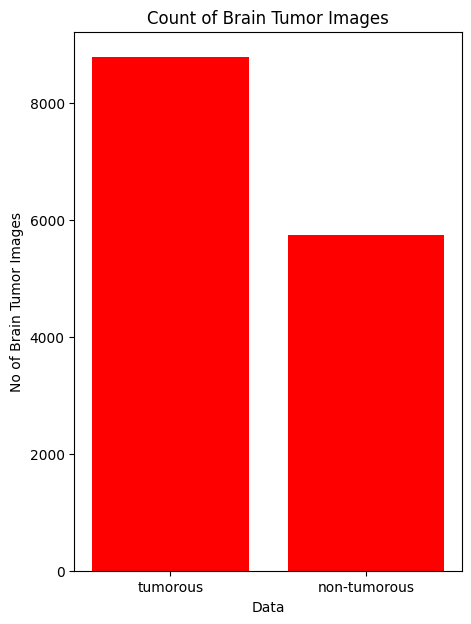

In [7]:
import matplotlib.pyplot as plt
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()

In [8]:
# Data Preprocessing

In [9]:
# Convert BGR TO GRAY
# GaussianBlur
# Threshold
# Erode
# Dilate
# Find Contours

In [1]:
import imutils
def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres =cv2.erode(thres, None, iterations = 2)
    thres = cv2.dilate(thres, None, iterations = 2)
    
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)
    
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 
    
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image
    

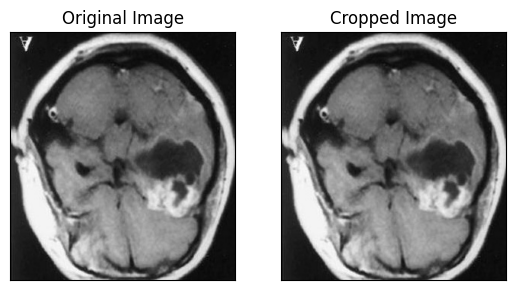

array([[[36, 36, 36],
        [37, 37, 37],
        [36, 36, 36],
        ...,
        [15, 15, 15],
        [16, 16, 16],
        [17, 17, 17]],

       [[36, 36, 36],
        [37, 37, 37],
        [35, 35, 35],
        ...,
        [14, 14, 14],
        [15, 15, 15],
        [16, 16, 16]],

       [[37, 37, 37],
        [37, 37, 37],
        [36, 36, 36],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [15, 15, 15]],

       ...,

       [[26, 26, 26],
        [20, 20, 20],
        [38, 38, 38],
        ...,
        [17, 17, 17],
        [16, 16, 16],
        [13, 13, 13]],

       [[26, 26, 26],
        [20, 20, 20],
        [38, 38, 38],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [13, 13, 13]],

       [[26, 26, 26],
        [20, 20, 20],
        [38, 38, 38],
        ...,
        [16, 16, 16],
        [17, 17, 17],
        [14, 14, 14]]], shape=(326, 296, 3), dtype=uint8)

In [4]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(r'augmented_data\yes\aug_Y_25_0_6957.jpg')

crop_brain_tumor(img, True)

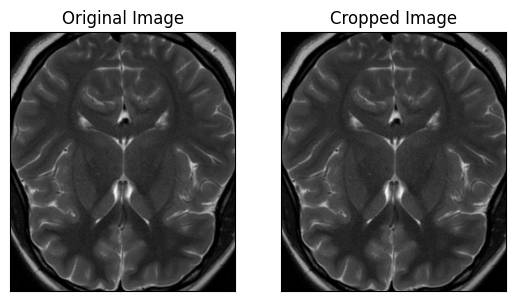

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [3, 3, 3]],

       [[4, 4, 4],
        [4, 4, 4],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [3, 3, 3]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[1, 1, 1],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [3, 3, 3],
        [3, 3, 3]],

       [[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]], shape=(451, 392, 3), dtype=uint8)

In [5]:
img = cv2.imread(r'augmented_data/no/aug_N_1_0_2753.jpg')
crop_brain_tumor(img, True)

In [7]:
import os
folder1 = 'augmented_data/no/'
folder2 = 'augmented_data/yes/'

for filename in os.listdir(folder1):
    img = cv2.imread(folder1 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder1 + filename, img)
for filename in os.listdir(folder2):
    img = cv2.imread(folder2 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder2 + filename, img)

In [8]:
# image loading

In [9]:
from sklearn.utils import shuffle
def load_data(dir_list, image_size):
    X=[]
    y=[]
    
    image_width, image_height=image_size
    
    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            image = crop_brain_tumor(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC)
            image = image/255.00
            X.append(image)
            if directory[-3:] == "yes":
                y.append(1)
            else:
                y.append(0)
    X=np.array(X)
    y=np.array(y)
    
    X,y = shuffle(X,y)
    print(f"Number of example is : {len(X)}")
    print(f"X SHAPE is : {X.shape}")
    print(f"y SHAPE is : {y.shape}")
    return X,y
            

In [33]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# -------------------------------
# CONFIGURATION
# -------------------------------
IMAGE_WIDTH, IMAGE_HEIGHT = 240, 240
BATCH_SIZE = 32
EPOCHS = 1
DATA_DIR = "augmented_data"  # path to your augmented dataset

# -------------------------------
# DATA LOADERS (NO MEMORY ERROR)
# -------------------------------
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# -------------------------------
# MODEL ARCHITECTURE
# -------------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification: yes/no tumor
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -------------------------------
# CALLBACKS
# -------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# -------------------------------
# TRAINING
# -------------------------------
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint]
)

# -------------------------------
# EVALUATION
# -------------------------------
loss, acc = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {acc*100:.2f}%")

# -------------------------------
# SAVE MODEL
# -------------------------------
model.save('brain_tumor_classifier.h5')
print("\n💾 Model saved as brain_tumor_classifier.h5")


Found 11625 images belonging to 2 classes.
Found 2906 images belonging to 2 classes.


c:\Users\yashwanth\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,561 (49.36 MB)

 Trainable params: 12,938,561 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\yashwanth\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


364/364 ━━━━━━━━━━━━━━━━━━━━ 281s 769ms/step - accuracy: 0.7738 - loss: 0.4951 - val_accuracy: 0.8021 - val_loss: 0.4579
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 165ms/step - accuracy: 0.8021 - loss: 0.4579



✅ Validation Accuracy: 80.21%

💾 Model saved as brain_tumor_classifier.h5


In [34]:
def plot_sample_images(X, y, n=50):

    for label in [0,1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

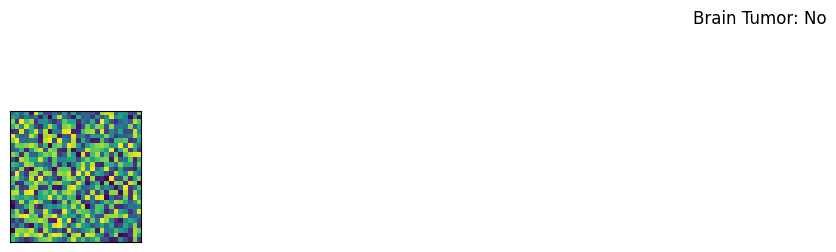

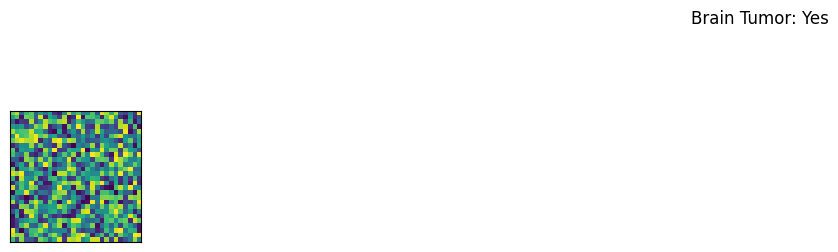

In [35]:
plot_sample_images(X,y)

In [36]:
# Data Spliting
# Train
# Test
# Validation

In [37]:
if not os.path.isdir('tumorous_and_nontumorous'):
    base_dir = 'tumorous_and_nontumorous'
    os.mkdir(base_dir)

In [38]:
if not os.path.isdir('tumorous_and_nontumorous/train'):
    train_dir = os.path.join(base_dir , 'train')
    os.mkdir(train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test'):
    test_dir = os.path.join(base_dir , 'test')
    os.mkdir(test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid'):
    valid_dir = os.path.join(base_dir , 'valid')
    os.mkdir(valid_dir)

In [39]:
if not os.path.isdir('tumorous_and_nontumorous/train/tumorous'):
    infected_train_dir = os.path.join(train_dir, 'tumorous')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/tumorous'):
    infected_test_dir = os.path.join(test_dir, 'tumorous')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/tumorous'):
    infected_valid_dir = os.path.join(valid_dir, 'tumorous')
    os.mkdir(infected_valid_dir)

In [40]:
if not os.path.isdir('tumorous_and_nontumorous/train/nontumorous'):
    healthy_train_dir = os.path.join(train_dir, 'nontumorous')
    os.mkdir(healthy_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/nontumorous'):
    healthy_test_dir = os.path.join(test_dir, 'nontumorous')
    os.mkdir(healthy_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/nontumorous'):
    healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')
    os.mkdir(healthy_valid_dir)

In [41]:
original_dataset_tumorours = os.path.join('augmented_data','yes/')
original_dataset_nontumorours = os.path.join('augmented_data','no/')

In [43]:
import os
import shutil

# Define your source (original) and destination (target) directories
original_dataset_tumorous = 'augmented_data/yes/'      # Folder containing original 'yes' images
infected_train_dir = 'data/train/infected/'            # Destination folder

# Create the destination directory if it doesn’t exist
os.makedirs(infected_train_dir, exist_ok=True)

# List all files in the source directory
files = os.listdir(original_dataset_tumorous)

# Select the first 759 files (or all if fewer)
fnames = files[:759]

# Copy each file from source to destination
for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

print(f"✅ Successfully copied {len(fnames)} files to '{infected_train_dir}'")


✅ Successfully copied 759 files to 'data/train/infected/'


In [45]:
import os
import shutil

# Define your source (original) and destination (target) directories
original_dataset_tumorous = 'augmented_data/yes/'      # Folder containing original 'yes' images
infected_train_dir = 'data/train/infected/'            # Destination folder

# Create the destination directory if it doesn’t exist
os.makedirs(infected_train_dir, exist_ok=True)

# List all files in the source directory
files = os.listdir(original_dataset_tumorous)

# Select the first 759 files (or all if fewer)
fnames = files[:759]

# Copy each file from source to destination
for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

print(f"✅ Successfully copied {len(fnames)} files to '{infected_train_dir}'")


✅ Successfully copied 759 files to 'data/train/infected/'


In [47]:
import os
import shutil

# Define your source (original) and destination (target) directories
original_dataset_tumorous = 'augmented_data/yes/'      # Folder containing original 'yes' images
infected_train_dir = 'data/train/infected/'            # Destination folder

# Create the destination directory if it doesn’t exist
os.makedirs(infected_train_dir, exist_ok=True)

# List all files in the source directory
files = os.listdir(original_dataset_tumorous)

# Select the first 759 files (or all if fewer)
fnames = files[:759]

# Copy each file from source to destination
for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

print(f"✅ Successfully copied {len(fnames)} files to '{infected_train_dir}'")


✅ Successfully copied 759 files to 'data/train/infected/'


In [48]:
# 80% 10% 10%

In [52]:
import os
import shutil

# ---------- YES (Tumorous / Infected) ----------
original_dataset_tumorous = 'augmented_data/yes/'        # Source folder
infected_train_dir = 'data/train/infected/'              # Destination folder

# Create destination directory if it doesn’t exist
os.makedirs(infected_train_dir, exist_ok=True)

# Copy first 759 infected images
files = os.listdir(original_dataset_tumorous)
fnames = files[:759]

for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

print(f"✅ Copied {len(fnames)} infected (yes) images to '{infected_train_dir}'")

# ---------- NO (Non-Tumorous / Healthy) ----------
original_dataset_nontumorous = 'augmented_data/no/'      # Source folder
healthy_train_dir = 'data/train/healthy/'                # Destination folder

# Create destination directory if it doesn’t exist
os.makedirs(healthy_train_dir, exist_ok=True)

# Copy first 686 healthy images
files = os.listdir(original_dataset_nontumorous)
fnames = files[:686]

for fname in fnames:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_train_dir, fname)
    shutil.copyfile(src, dst)

print(f"✅ Copied {len(fnames)} healthy (no) images to '{healthy_train_dir}'")


✅ Copied 759 infected (yes) images to 'data/train/infected/'
✅ Copied 686 healthy (no) images to 'data/train/healthy/'


In [54]:
import os
import shutil

# ---------- YES (Tumorous / Infected) ----------
original_dataset_tumorous = 'augmented_data/yes/'        # Source folder
infected_train_dir = 'data/train/infected/'              # Destination folder

# Create destination directory if it doesn’t exist
os.makedirs(infected_train_dir, exist_ok=True)

# Copy first 759 infected images
files = os.listdir(original_dataset_tumorous)
fnames = files[:759]

for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(infected_train_dir, fname)
    shutil.copyfile(src, dst)

print(f"✅ Copied {len(fnames)} infected (yes) images to '{infected_train_dir}'")

# ---------- NO (Non-Tumorous / Healthy) ----------
original_dataset_nontumorous = 'augmented_data/no/'      # Source folder
healthy_train_dir = 'data/train/healthy/'                # Destination folder

# Create destination directory if it doesn’t exist
os.makedirs(healthy_train_dir, exist_ok=True)

# Copy first 686 healthy images
files = os.listdir(original_dataset_nontumorous)
fnames = files[:686]

for fname in fnames:
    src = os.path.join(original_dataset_nontumorous, fname)
    dst = os.path.join(healthy_train_dir, fname)
    shutil.copyfile(src, dst)

print(f"✅ Copied {len(fnames)} healthy (no) images to '{healthy_train_dir}'")


✅ Copied 759 infected (yes) images to 'data/train/infected/'
✅ Copied 686 healthy (no) images to 'data/train/healthy/'


In [56]:
import os
import shutil

# Paths
source_dir = 'augmented_data/no/'             # Source folder
healthy_valid_dir = 'data/validation/healthy/'  # Destination folder for validation set

# Create destination directory if it doesn’t exist
os.makedirs(healthy_valid_dir, exist_ok=True)

# Number of files to copy
N = 146  # adjust as needed

# Get all files and sort them
files = sorted(os.listdir(source_dir))

# Take the last N files safely
fnames = files[-N:]

# Copy each file
for fname in fnames:
    src = os.path.join(source_dir, fname)
    dst = os.path.join(healthy_valid_dir, fname)
    shutil.copyfile(src, dst)

print(f"✅ Copied {len(fnames)} files to {healthy_valid_dir}")


✅ Copied 146 files to data/validation/healthy/


In [57]:
# Model Buliding

In [58]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1.0/255)
valid_data_gen = ImageDataGenerator(rescale=1.0/255)

In [59]:
train_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/train/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')


Found 1445 images belonging to 2 classes.


In [60]:
test_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/test/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')


Found 310 images belonging to 2 classes.


In [61]:
valid_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/valid/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')


Found 309 images belonging to 2 classes.


In [62]:
class_labels = train_generator.class_indices
class_name = {value: key for (key,value) in class_labels.items()}

In [63]:
class_name

{0: 'nontumorous', 1: 'tumorous'}

In [66]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model

base_model = VGG19(input_shape = (240,240,3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable=False

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_01 = Model(base_model.input, output)
model_01.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [68]:
# callback
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
filepath = 'model.h5'
es = EarlyStopping(monitor='val_loss', verbose = 1, mode='min',patience=4)
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose = 1, save_best_only=True, save_weights_only=False, mode='auto',save_freq='epoch')
lrr = ReduceLROnPlateau(monitor='val_accuarcy', patience=3, verbose = 1, factor = 0.5, min_lr = 0.0001)

In [70]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_01.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

c:\Users\yashwanth\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [71]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ----------------------
# Callbacks
# ----------------------

# EarlyStopping: stop training when validation accuracy stops improving
es = EarlyStopping(
    monitor='val_accuracy',   # correct metric name
    mode='max',               # maximize accuracy
    patience=5,               # wait 5 epochs
    verbose=1,
    restore_best_weights=True
)

# ModelCheckpoint: save the best model based on validation accuracy
cp = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# ReduceLROnPlateau: reduce learning rate if validation accuracy plateaus
lrr = ReduceLROnPlateau(
    monitor='val_accuracy',
    mode='max',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# ----------------------
# Train the model
# ----------------------

history_01 = model_01.fit(
    train_generator,
    steps_per_epoch=10,        # adjust according to your training dataset
    epochs=2,                  # adjust epochs as needed
    validation_data=valid_generator,
    callbacks=[es, cp, lrr]
)


Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4826 - loss: 0.7537
Epoch 1: val_accuracy improved from None to 0.53074, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 103s 11s/step - accuracy: 0.5219 - loss: 0.7275 - val_accuracy: 0.5307 - val_loss: 0.7448 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5369 - loss: 0.7183
Epoch 2: val_accuracy improved from 0.53074 to 0.53722, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 15s/step - accuracy: 0.5406 - loss: 0.7157 - val_accuracy: 0.5372 - val_loss: 0.6898 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 2.


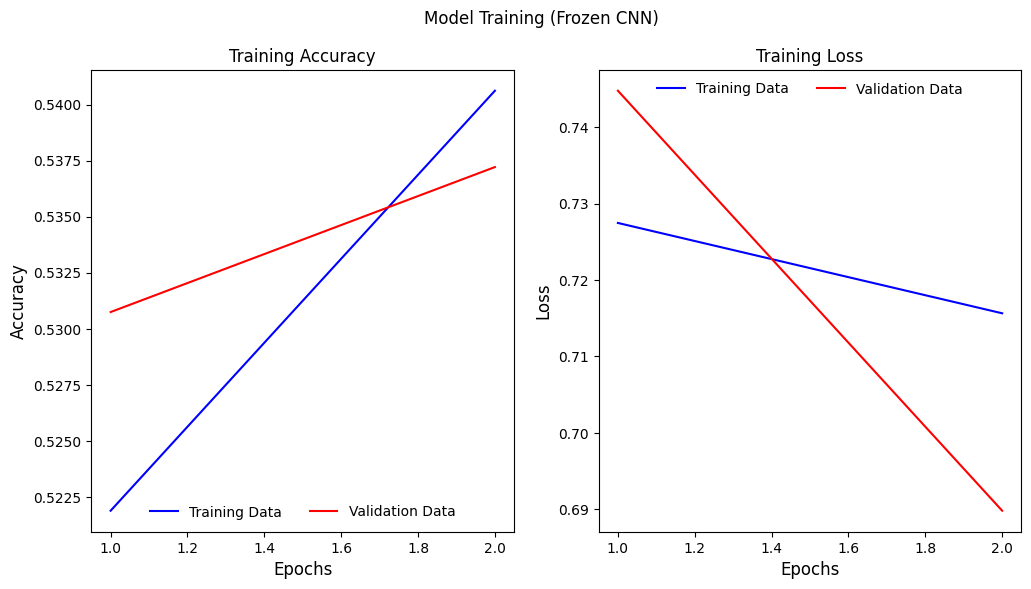

In [72]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [73]:
import os

# Create directory if it doesn't exist
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')

# Save weights with correct extension
model_01.save_weights(filepath="model_weights/vgg19_model_01.weights.h5", overwrite=True)


In [74]:
model_01.load_weights("model_weights/vgg19_model_01.weights.h5")
vgg_val_eval_01 = model_01.evaluate(valid_generator)
vgg_test_eval_01 = model_01.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.5922 - loss: 0.6737


c:\Users\yashwanth\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.4903 - loss: 0.7118


In [75]:
print(f'Validation Loss: {vgg_val_eval_01[0]}')
print(f'Validation Acc: {vgg_val_eval_01[1]}')
print(f'Testing Loss: {vgg_test_eval_01[0]}')
print(f'Testing Acc: {vgg_test_eval_01[1]}')

Validation Loss: 0.6736785769462585
Validation Acc: 0.5922330021858215
Testing Loss: 0.7118212580680847
Testing Acc: 0.4903225898742676


In [76]:
def test_generator():
    filenames = test_generator.filenames
    nb_sample = len(filenames)
    
    vgg_prediction_01 = model_01.predict(test_generator, steps=nb_sample, verbose = 1)
    y_pred = np.argmax(vgg_prediction_01, axis=1)

In [77]:
# Increamental unfreezing and fine tuning

In [78]:
from tensorflow.keras.applications import VGG19  # ✅ import added
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load VGG19 base model without the top (fully connected) layers
base_model = VGG19(include_top=False, input_shape=(240,240,3))

# List the names of all layers (optional — for exploration)
base_model_layer_names = [layer.name for layer in base_model.layers]
print("✅ VGG19 base model loaded successfully!")
print(f"Total layers: {len(base_model_layer_names)}")


✅ VGG19 base model loaded successfully!
Total layers: 22


In [79]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_02 = Model(base_model.inputs, output)
model_02.load_weights(r"C:\Users\yashwanth\Documents\Advance_Brain_Tumor_Classification-main\model_weights\vgg19_model_01.weights.h5")


set_trainable=False
for layer in base_model.layers:
    if layer.name in ['block5_conv4','block5_conv3']:
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

print(model_02.summary())

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 125,641,602 (479.28 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

None


In [80]:
def SGD():
    sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
    model_02.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [81]:
def train_generator():
    history_02 = model_02.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

In [82]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Build base model (no top layers)
base_model = VGG19(include_top=False, input_shape=(240,240,3), weights='imagenet')

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(4608, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1152, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

# Create model
model_01 = Model(inputs=base_model.input, outputs=output)
model_01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_01.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Found 1872 images belonging to 2 classes.
Found 146 images belonging to 2 classes.
Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5658 - loss: 0.7110
Epoch 1: val_loss improved from None to 1.83162, saving model to model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 419s 4s/step - accuracy: 0.6095 - loss: 0.6751 - val_accuracy: 0.0000e+00 - val_loss: 1.8316 - learning_rate: 1.0000e-04
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6530 - loss: 0.6208
Epoch 2: val_loss improved from 1.83162 to 0.59548, saving model to model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 416s 4s/step - accuracy: 0.6581 - loss: 0.6165 - val_accuracy: 0.7292 - val_loss: 0.5955 - learning_rate: 1.0000e-04
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6948 - loss: 0.5792
Epoch 3: val_loss improved from 0.59548 to 0.47655, saving model to model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 421s 4s/step - accuracy: 0.6683 - loss: 0.5996 - val_accuracy: 0.9028 - val_loss: 0.4766 - learning_

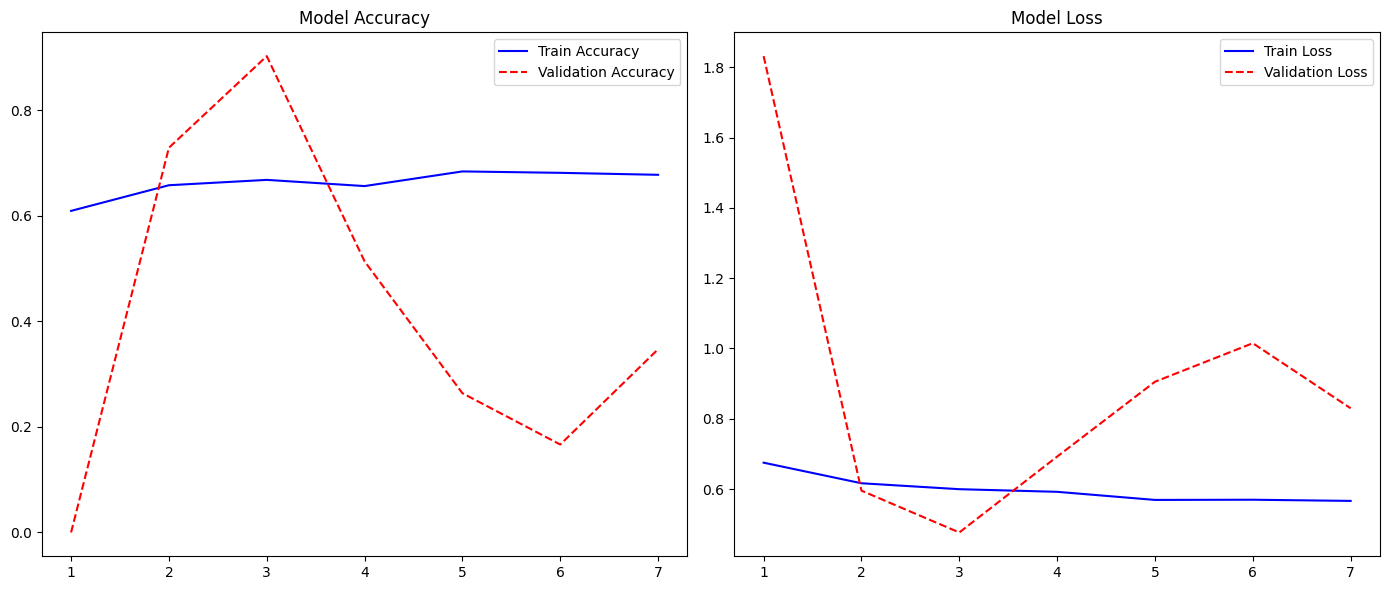

In [ ]:
# --- Imports ---
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from PIL import Image

# --- Paths ---
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, "data", "train")
valid_dir = os.path.join(base_dir, "data", "validation")
subfolders = ['healthy', 'infected']

# --- Ensure all required folders exist ---
for folder in [train_dir, valid_dir]:
    for sub in subfolders:
        path = os.path.join(folder, sub)
        os.makedirs(path, exist_ok=True)

# --- Safe Preprocessing: Remove non-image or corrupted files ---
def clean_folder(folder):
    if not os.path.exists(folder):
        print(f"Folder not found, skipping: {folder}")
        return
    for fname in os.listdir(folder):
        fpath = os.path.join(folder, fname)
        if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            print("Removing non-image file:", fpath)
            os.remove(fpath)
        else:
            try:
                img = Image.open(fpath)
                img.verify()
            except:
                print("Removing corrupted file:", fpath)
                os.remove(fpath)

for folder in [train_dir, valid_dir]:
    for sub in subfolders:
        clean_folder(os.path.join(folder, sub))

# --- Data Generators ---
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(240,240),
    batch_size=16,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(240,240),
    batch_size=16,
    class_mode='categorical'
)

# --- Build VGG19 Model ---
base_model = VGG19(include_top=False, input_shape=(240,240,3), weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(4608, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1152, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

model_01 = Model(inputs=base_model.input, outputs=output)

# --- Compile Model ---
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model_01.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# --- Callbacks ---
checkpoint_path = 'model.keras'  # native Keras format
es = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min')
cp = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=1e-4, verbose=1)

callbacks = [es, cp, lrr]

# --- Train Model ---
history_01 = model_01.fit(
    train_generator,
    steps_per_epoch=max(1, train_generator.samples // train_generator.batch_size),
    validation_data=valid_generator,
    validation_steps=max(1, valid_generator.samples // valid_generator.batch_size),
    epochs=10,
    callbacks=callbacks
)

# --- Plot Training History ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
epochs_range = range(1, len(history_01.history['accuracy']) + 1)

# Accuracy
ax1.plot(epochs_range, history_01.history['accuracy'], 'b-', label='Train Accuracy')
ax1.plot(epochs_range, history_01.history['val_accuracy'], 'r--', label='Validation Accuracy') 
ax1.set_title('Model Accuracy')
ax1.legend()

# Loss
ax2.plot(epochs_range, history_01.history['loss'], 'b-', label='Train Loss')
ax2.plot(epochs_range, history_01.history['val_loss'], 'r--', label='Validation Loss')
ax2.set_title('Model Loss')
ax2.legend()

plt.tight_layout()
plt.show() 


In [90]:
import os

# Create folder if it doesn't exist
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')

# Save model weights (TensorFlow 3.x requires `.weights.h5` for save_weights)
model_02.save_weights(filepath="model_weights/vgg19_model_02.weights.h5", overwrite=True)
print("✅ Weights saved successfully!")


✅ Weights saved successfully!


In [93]:
# Recreate the model architecture exactly as before
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

# Build model architecture
base_model = VGG19(include_top=False, input_shape=(240,240,3), weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(4608, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1152, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

model_02 = Model(inputs=base_model.input, outputs=output)

# Compile the model BEFORE loading weights
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model_02.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Load weights
model_02.load_weights("model_weights/vgg19_model_02.weights.h5")

# Evaluate
vgg_val_eval_02 = model_02.evaluate(valid_generator)
print("Validation Evaluation:", vgg_val_eval_02)


c:\Users\yashwanth\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 2 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8836 - loss: 0.5584
Validation Evaluation: [0.5583847761154175, 0.8835616707801819]


In [ ]:
# Unfreezing the entire network

In [95]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

# Rebuild the model architecture exactly as before
base_model = VGG19(include_top=False, input_shape=(240,240,3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(4608, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1152, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

model_03 = Model(inputs=base_model.input, outputs=output)

# Compile BEFORE loading weights
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model_03.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Load the correct weights file
model_03.load_weights('model_weights/vgg19_model_02.weights.h5')

print("✅ Weights loaded successfully!")


✅ Weights loaded successfully!


In [96]:
model_03.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [97]:
# history_03 = model_03.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

Found 1872 images belonging to 2 classes.
Found 146 images belonging to 2 classes.
⚠️ No images found in test set. Skipping test evaluation.
Epoch 1/3


c:\Users\yashwanth\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
c:\Users\yashwanth\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 74s/step - accuracy: 0.5854 - loss: 0.7080  
Epoch 1: val_loss improved from None to 0.91235, saving model to model_weights/vgg_unfrozen.weights.h5


117/117 ━━━━━━━━━━━━━━━━━━━━ 8596s 74s/step - accuracy: 0.5994 - loss: 0.6736 - val_accuracy: 0.1944 - val_loss: 0.9124 - learning_rate: 1.0000e-04
Epoch 2/3
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6557 - loss: 0.6108
Epoch 2: val_loss improved from 0.91235 to 0.38654, saving model to model_weights/vgg_unfrozen.weights.h5


117/117 ━━━━━━━━━━━━━━━━━━━━ 431s 4s/step - accuracy: 0.6469 - loss: 0.6177 - val_accuracy: 0.9653 - val_loss: 0.3865 - learning_rate: 1.0000e-04
Epoch 3/3
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6687 - loss: 0.5921
Epoch 3: val_loss did not improve from 0.38654
117/117 ━━━━━━━━━━━━━━━━━━━━ 466s 4s/step - accuracy: 0.6640 - loss: 0.5927 - val_accuracy: 0.8681 - val_loss: 0.5090 - learning_rate: 1.0000e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8699 - loss: 0.5074
Validation Evaluation: [0.5073848366737366, 0.8698630332946777]
Test evaluation skipped due to no images in test folder.


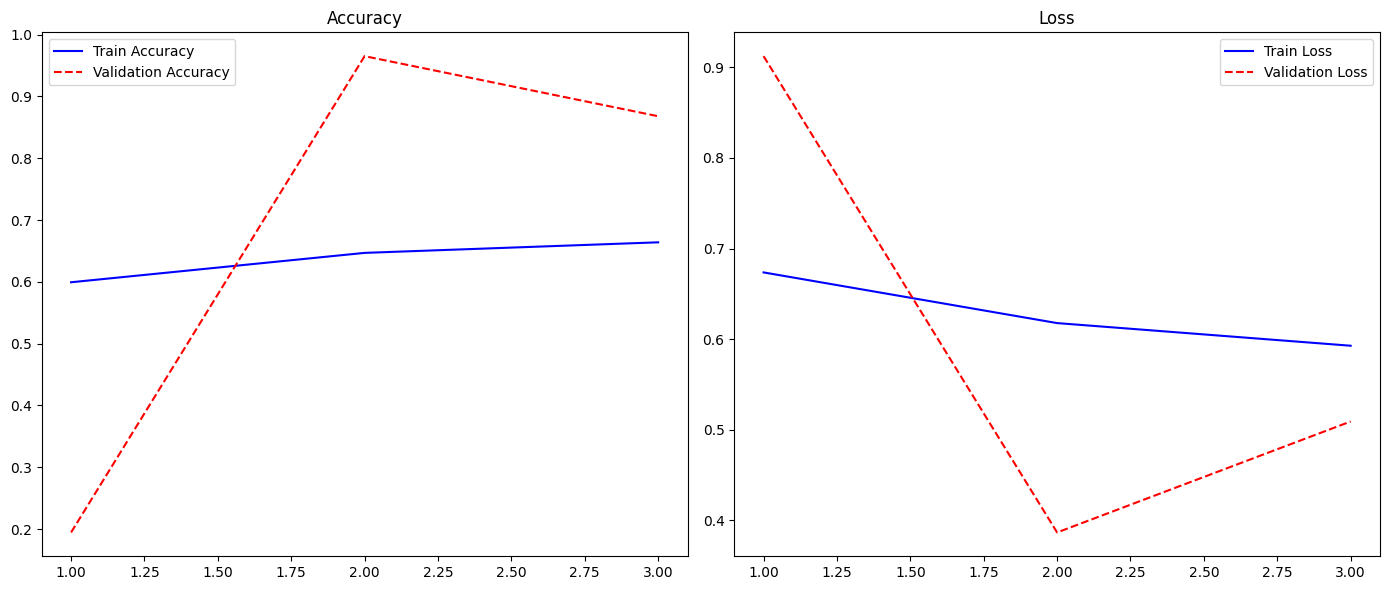

In [1]:
# --- Imports ---
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# --- Paths ---
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, "data", "train")
valid_dir = os.path.join(base_dir, "data", "validation")
test_dir  = os.path.join(base_dir, "data", "test")
subfolders = ['healthy', 'infected']

# --- Create missing folders ---
for folder in [train_dir, valid_dir, test_dir]:
    for sub in subfolders:
        os.makedirs(os.path.join(folder, sub), exist_ok=True)

# --- Safe preprocessing: remove corrupted/non-image files ---
def clean_folder(folder):
    if not os.path.exists(folder):
        print(f"Folder not found, skipping: {folder}")
        return
    for fname in os.listdir(folder):
        fpath = os.path.join(folder, fname)
        if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            print("Removing non-image file:", fpath)
            os.remove(fpath)
        else:
            try:
                img = Image.open(fpath)
                img.verify()
            except:
                print("Removing corrupted file:", fpath)
                os.remove(fpath)

for folder in [train_dir, valid_dir, test_dir]:
    for sub in subfolders:
        clean_folder(os.path.join(folder, sub))

# --- Data Generators ---
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(240,240), batch_size=16, class_mode='categorical'
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size=(240,240), batch_size=16, class_mode='categorical'
)

# Only create test generator if images exist
def create_safe_generator(test_dir):
    total_images = sum(len(os.listdir(os.path.join(test_dir, sub))) for sub in subfolders if os.path.exists(os.path.join(test_dir, sub)))
    if total_images == 0:
        print("⚠️ No images found in test set. Skipping test evaluation.")
        return None
    else:
        return test_datagen.flow_from_directory(
            test_dir,
            target_size=(240,240),
            batch_size=16,
            class_mode='categorical'
        )

test_generator = create_safe_generator(test_dir)

# --- Build VGG19 model ---
base_model = VGG19(include_top=False, input_shape=(240,240,3), weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(4608, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1152, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# --- Compile ---
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# --- Callbacks ---
os.makedirs('model_weights', exist_ok=True)
checkpoint_path = 'model_weights/vgg_unfrozen.weights.h5'
es = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min')
cp = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=1e-4, verbose=1)
callbacks = [es, cp, lrr]

# --- Train model ---
history = model.fit(
    train_generator,
    steps_per_epoch=max(1, train_generator.samples // train_generator.batch_size),
    validation_data=valid_generator,
    validation_steps=max(1, valid_generator.samples // valid_generator.batch_size),
    epochs=3,
    callbacks=callbacks
)

# --- Save full model ---
model.save('model_weights/vgg_full_model.keras')

# --- Load weights safely ---
model = tf.keras.models.load_model('model_weights/vgg_full_model.keras')


# --- Evaluate ---
val_eval = model.evaluate(valid_generator)
print("Validation Evaluation:", val_eval)

if test_generator is not None:
    test_eval = model.evaluate(test_generator)
    print("Test Evaluation:", test_eval)
else:
    print("Test evaluation skipped due to no images in test folder.")

# --- Plot training history ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
epochs_range = range(1, len(history.history['accuracy']) + 1)

# Accuracy
ax1.plot(epochs_range, history.history['accuracy'], 'b-', label='Train Accuracy')
ax1.plot(epochs_range, history.history['val_accuracy'], 'r--', label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.legend()

# Loss
ax2.plot(epochs_range, history.history['loss'], 'b-', label='Train Loss')
ax2.plot(epochs_range, history.history['val_loss'], 'r--', label='Validation Loss')
ax2.set_title('Loss')
ax2.legend()

plt.tight_layout() 
plt.show()


In [ ]:
# Google Colab